As we know from Basic Data Exploration, the data is not stationary.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('../data/SnP futures intraday.xlsx')
df = df.rename(columns={'Time at end of bar': 'DATE', 'OPEN': 'OPEN', 'HIGH': 'HIGH',
                       'LOW': 'LOW', 'CLOSE': 'CLOSE', 'VOLUME': 'VOLUME'})
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE').reset_index(drop=True)

print(df.head())
print(df.info())
print(df.describe()) 

                 DATE     OPEN     HIGH      LOW    CLOSE  VOLUME
0 2024-12-11 18:00:00  6087.50  6087.75  6086.50  6086.75     513
1 2024-12-11 18:01:00  6086.75  6087.00  6085.25  6085.50     366
2 2024-12-11 18:02:00  6085.50  6087.25  6085.50  6087.00     239
3 2024-12-11 18:03:00  6087.00  6087.50  6087.00  6087.25      80
4 2024-12-11 18:04:00  6087.00  6087.50  6087.00  6087.25     124
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185880 entries, 0 to 185879
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   DATE    185880 non-null  datetime64[ns]
 1   OPEN    185880 non-null  float64       
 2   HIGH    185880 non-null  float64       
 3   LOW     185880 non-null  float64       
 4   CLOSE   185880 non-null  float64       
 5   VOLUME  185880 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 8.5 MB
None
                                DATE           OPEN         

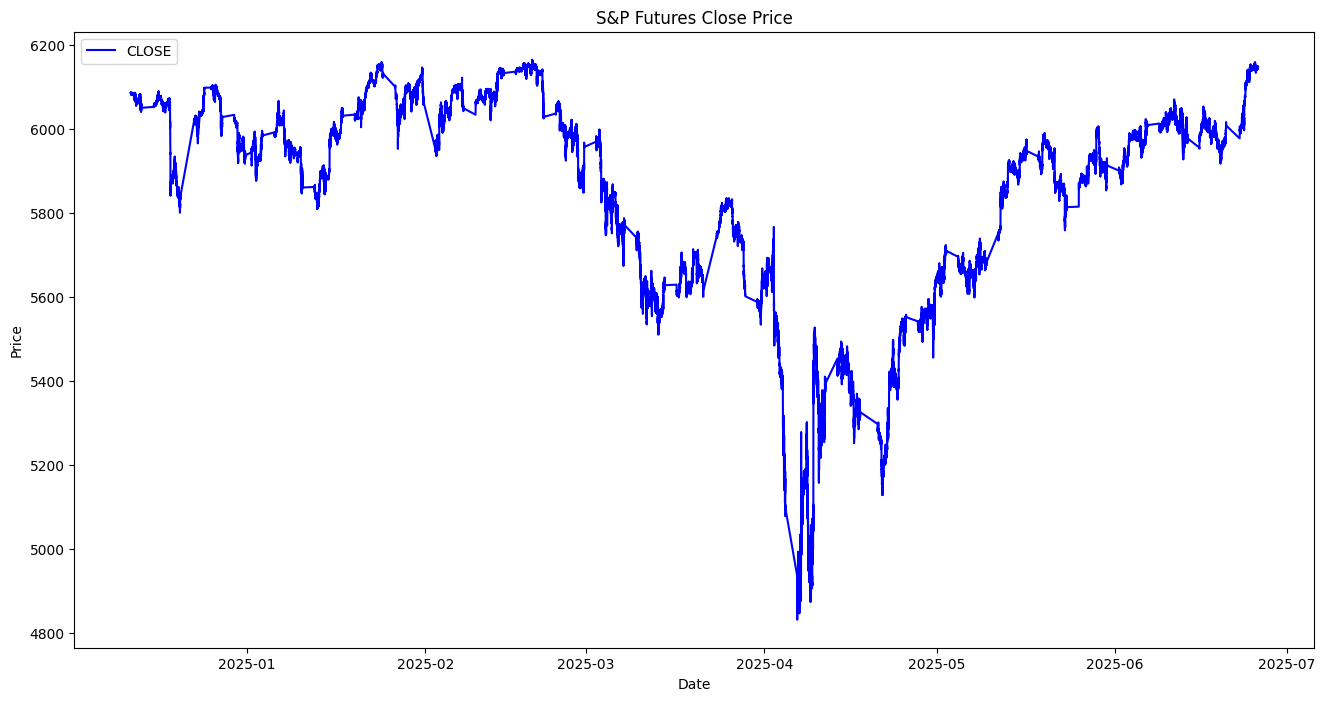

In [3]:
import matplotlib.pyplot as plt

def plot(y_label, title = 'S&P Futures Close Price'):
    plt.figure(figsize=(16, 8))
    plt.plot(df['DATE'], df[y_label], label=y_label, color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot('CLOSE')

In [ ]:
# Check for stationarity using ADF test
from statsmodels.tsa.stattools import adfuller

def check_stationarity_adf(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    if result[1] <= 0.05:  # Common significance level
        print("Series is likely stationary (reject null hypothesis of unit root)")
    else:
        print("Series is likely non-stationary (fail to reject null hypothesis of unit root)")

print(check_stationarity_adf(df['CLOSE_boxcox']))

ADF Statistic: -0.5503730292236467
p-value: 0.8818061111601829
Critical Values:
	1%: -3.430385192069406
	5%: -2.861555554422488
	10%: -2.5667782790610096
Series is likely non-stationary (fail to reject null hypothesis of unit root)
None


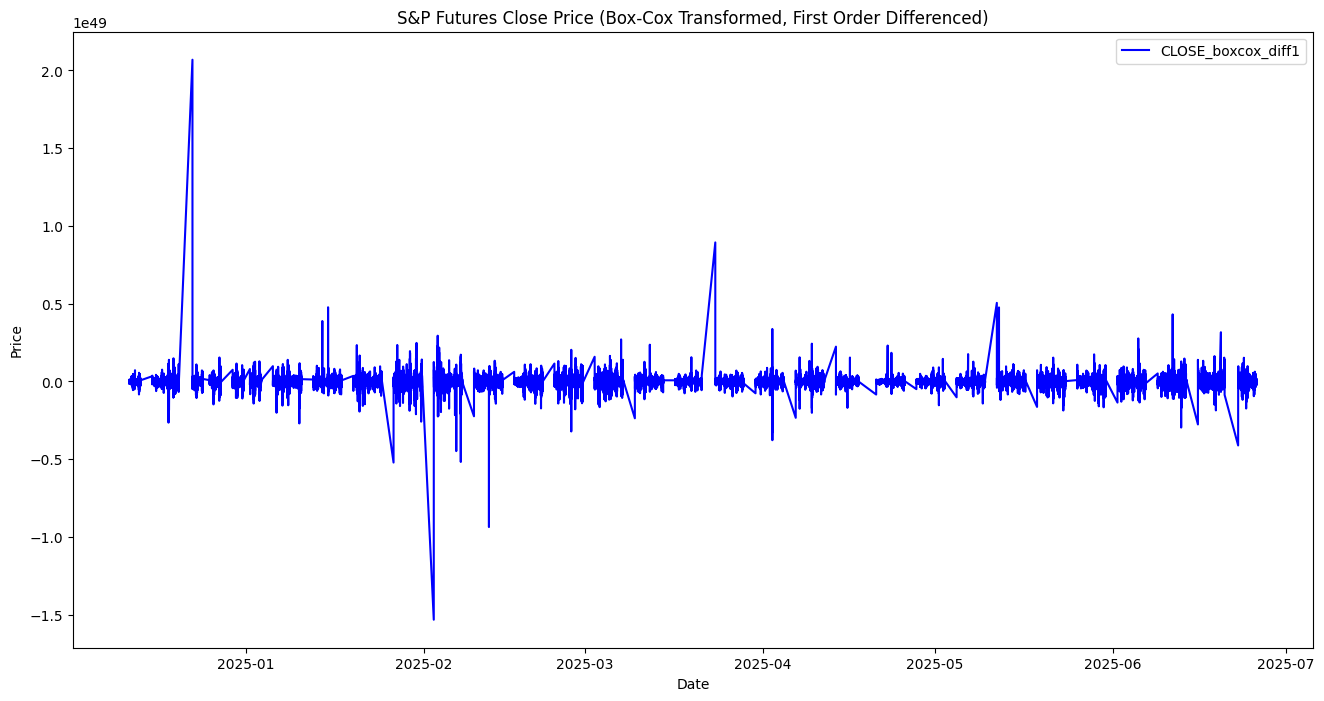

In [17]:
# Perform second-order differencing
df['CLOSE_boxcox_diff1'] = df['CLOSE_boxcox'].diff()  # First-order differencing
df.dropna(inplace=True)

plot('CLOSE_boxcox_diff1', 'S&P Futures Close Price (Box-Cox Transformed, First Order Differenced)')

In [18]:
# Check for stationarity using ADF test
print(check_stationarity_adf(df['CLOSE_boxcox_diff1'])) # The data is now stationary

ADF Statistic: -55.173612802679045
p-value: 0.0
Critical Values:
	1%: -3.430385192448191
	5%: -2.8615555545899047
	10%: -2.5667782791501197
Series is likely stationary (reject null hypothesis of unit root)
None


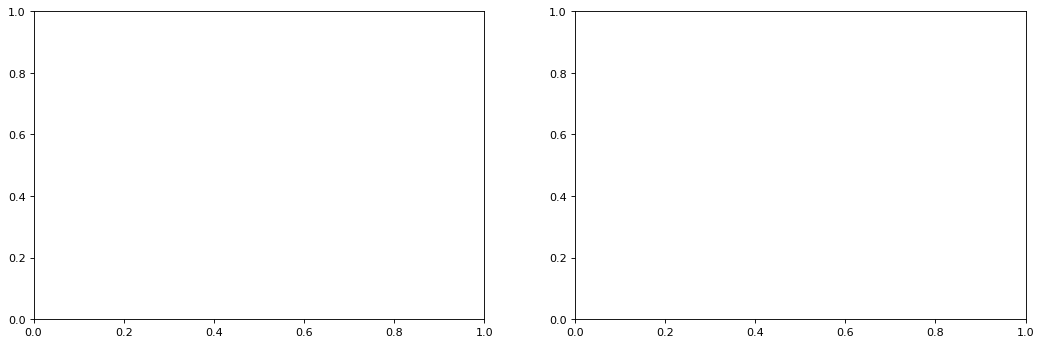

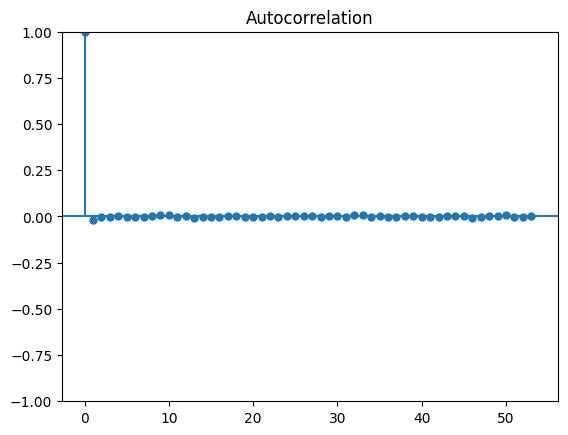

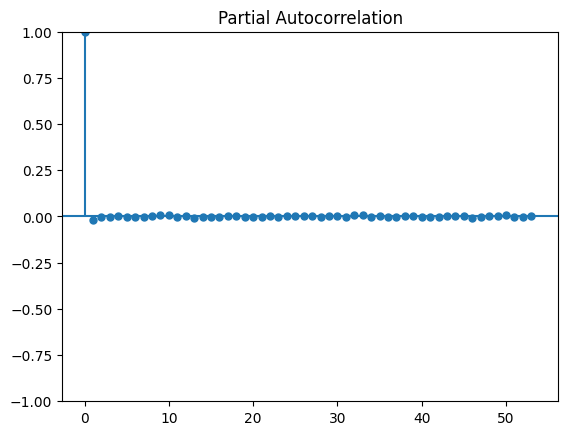

In [19]:
# Modeling, plotting the ACF and PACF
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_acf(df['CLOSE_boxcox_diff1'])
plot_pacf(df['CLOSE_boxcox_diff1'], method='ywm')
plt.show()

# As we are using auto arima, we can skip the manual selection of p, d, q values.